Loaded 1002 images.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,586 (654.63 KB)

 Trainable params: 167,586 (654.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.5465 - loss: 0.6866 - val_accuracy: 0.6770 - val_loss: 0.6079
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6600 - loss: 0.6442 - val_accuracy: 1.0000 - val_loss: 0.5832
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7186 - loss: 0.5726 - val_accuracy: 1.0000 - val_loss: 0.1737
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9000 - loss: 0.3010 - val_accuracy: 1.0000 - val_loss: 0.1323
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8408 - loss: 0.3529 - val_accuracy: 1.0000 - val_loss: 0.1866
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8400 - loss: 0.2884 - val_accuracy: 1.0000 - val_loss: 0.0807
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9560 - loss: 0.1850 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9400 - loss: 0.1580 - val_accuracy: 1

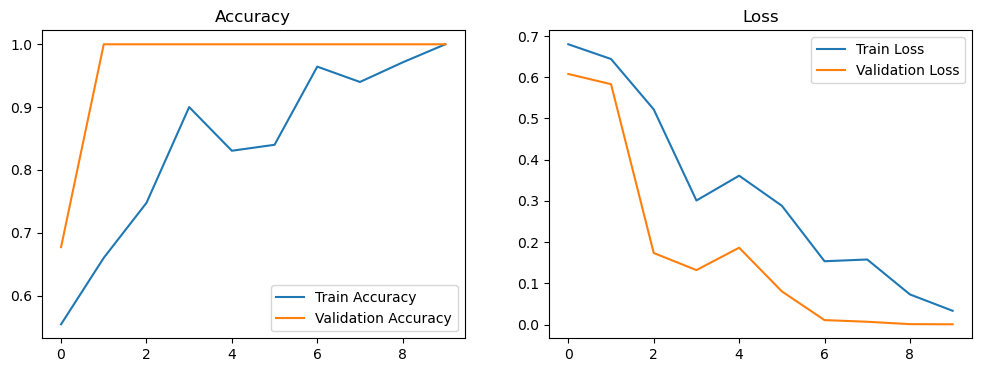

In [211]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing function
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale as in training
    img = cv2.equalizeHist(img)
    img = img / 255.0
    img = img.astype(np.float32)
    return img

# Parameters
path = 'images'
imgDimension = (32, 32)
numOfClasses = 2

# Load images and labels
images = []
labels = []

for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    if not os.path.isdir(class_path):
        continue
    label = int(class_folder)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        # Resize and preprocess the image
        img = cv2.resize(img, imgDimension)
        img = preprocessing(img)
        
        # Reshape for Keras (add channel dimension)
        img = img.reshape(imgDimension[1], imgDimension[0], 1)
        
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images.")

# Split dataset into train, validation, test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# One-hot encode labels
y_train_cat = to_categorical(y_train, numOfClasses)
y_val_cat = to_categorical(y_val, numOfClasses)
y_test_cat = to_categorical(y_test, numOfClasses)

# Data augmentation
dataGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)

dataGen.fit(x_train)

# Build CNN model
def create_model():
    model = Sequential([
        # The input shape is now (32, 32, 1) for grayscale images
        Conv2D(32, (3, 3), activation='relu', input_shape=(imgDimension[1], imgDimension[0], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(numOfClasses, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

# Train model
history = model.fit(
    dataGen.flow(x_train, y_train_cat, batch_size=50),
    steps_per_epoch=len(x_train) // 50,
    epochs=10,
    validation_data=(x_val, y_val_cat),
    shuffle=True
)

# Save trained model
model.save("MyTrainingModel.keras")

# Optional: plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()